In [59]:
import numpy as np 
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing 
from sklearn.decomposition import PCA 
from sklearn import cross_validation 
from sklearn.cross_validation import ShuffleSplit, train_test_split 
from sklearn import metrics 
from sklearn.learning_curve import learning_curve 
from sklearn.grid_search import GridSearchCV 
import pandas as pd 
from pandas.tools.plotting import scatter_matrix  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
import matplotlib.pyplot as plt  
from sklearn.datasets import load_digits 
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
%matplotlib inline 

# Importing California housing dataset from sklearn

In [60]:
cal=fetch_california_housing() #importing data for california housing
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n 

# Converting into dataframe

In [61]:
data_list=np.array(cal['data']).tolist()

In [62]:
names_list=np.array(cal['feature_names']).tolist()
index=list(range(20640))
df = pd.DataFrame(index=index, columns=names_list,data=data_list)
df['target']=cal['target']

In [63]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
df.info()  # no null object #data is clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB


# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D125A08828>,
      dtype=object)

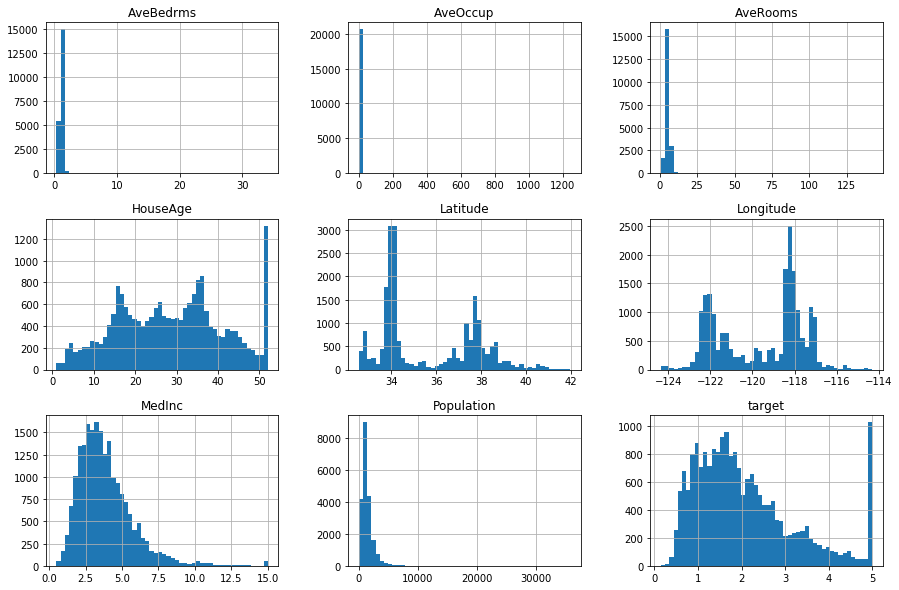

In [65]:
df.hist(bins=50,figsize=(15,10))

Text(0.5,1,'Distribution of households')

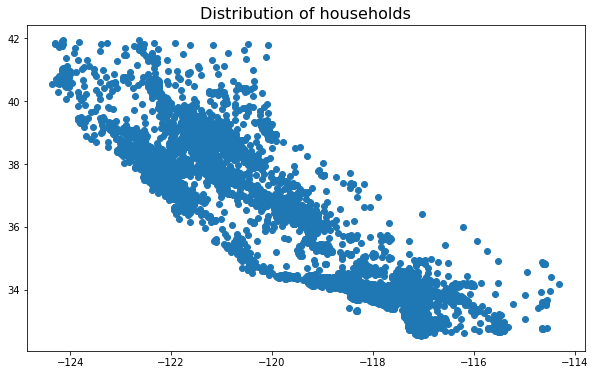

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Longitude'],y=df['Latitude'])
plt.title("Distribution of households",size=16)

# First we will find predictions from a single decision tree

In [67]:
Xdt=df.drop('target',axis=1)  #assigning features
ydt=df['target']              #assigning target variable
Xdt=Xdt.values
ydt=ydt.values


In [68]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(Xdt,ydt,test_size=0.3) #split for decision tree 70/30 split
dtreg=DecisionTreeRegressor()    

In [69]:
dtreg.fit(Xdt_train,ydt_train)      #fitting training data inside decision tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
ydt_pred = dtreg.predict(Xdt_test)       #prediciting for test set

In [71]:
dt_r2 = r2_score(ydt_test, ydt_pred, multioutput='variance_weighted')               
print ('Model score using a single Decision Tree : {}'.format(round(dt_r2,2)))# finding r2 score for comparison

Model score using a single Decision Tree : 0.64


# Using Gradient Boosting regression (using an ensemble of decision trees)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(cal.data, cal.target,test_size=0.3)  
#split for gradeint boostingg regression 70/30 split

In [73]:
print (X_train.shape, X_test.shape)

(14448, 8) (6192, 8)


In [74]:
gbrt=GradientBoostingRegressor(n_estimators=100) 
#right now using default learning rate(0.1). Later by tuning we will find the best rate

gbrt.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [75]:
y_predict = gbrt.predict(X_test)

In [76]:
acc_gr = r2_score(y_test, y_predict, multioutput='variance_weighted')
print ('Model score using Gradient Boosting : {}'.format(round(acc_gr,3)))

Model score using Gradient Boosting : 0.789


# Gradient Boosting with cross validation

In [77]:
def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) #using gridsearch to find best parameters
    classifier.fit(X_train, y_train)
    return cv, classifier.best_estimator_

In [78]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
    return plt

In [79]:
param_grid={'n_estimators':[100], 'learning_rate': [0.1], 
            'max_depth':[6], 
            'min_samples_leaf':[3],
            'max_features':[1.0], 
           } 
n_jobs=4  
cv,best_est=GradientBooster(param_grid, n_jobs) 


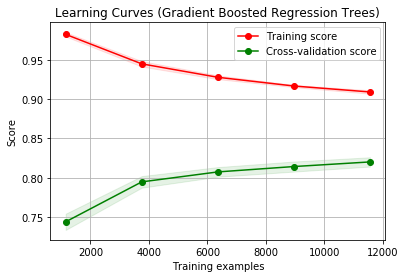

In [80]:
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, 
                                      max_depth=best_est.max_depth, 
                                      learning_rate=best_est.learning_rate, 
                                      min_samples_leaf=best_est.min_samples_leaf, 
                                      max_features=best_est.max_features) 

plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.show() 

# Bias-Variance

In [81]:
def bias(y_predict,y):
    y_predict = np.array(y_predict)
    y = np.array(y)
    return np.mean(np.power((y_predict-y),2))


#this function calculate the variance
def variance(y_predict,y):
    y_predict = np.array(y_predict)
    return np.var(y_predict)


In [82]:
bias_gb=[]
var_gb=[]
total_gb=[]
j=0
for k in range(1,100):  #range starts from 1 since since atleast 1 estimator is required for Gradient boosting regression
    model_gb = GradientBoostingRegressor(n_estimators=k)
    model_gb.fit(X_train,y_train)
    predictions_test = model_gb.predict(X_test) # X_train # X_test
    predictions_train = model_gb.predict(X_train) # X_train # X_test
  
    y_test_k=y_test
    y_predict_k=predictions_test
    bia_k = bias(y_predict_k,y_test_k)
    bias_gb.append(bia_k)
    var_k = variance(y_predict_k,y_test_k)
    var_gb.append(var_k)
    total_k = bia_k+var_k
    total_gb.append(total_k)

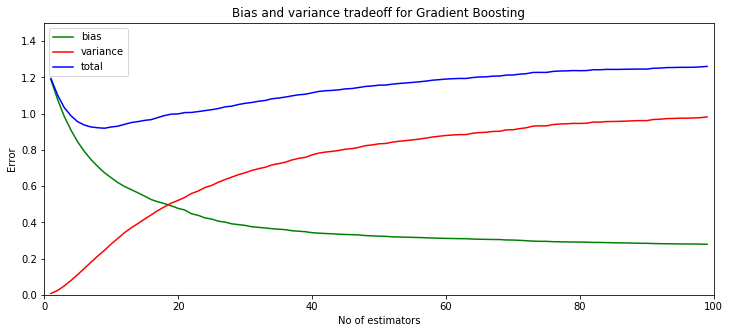

In [83]:
k=list(range(1,100))
plt.figure(figsize=(12, 5))
plt.plot(k, bias_gb,color='g',label="bias")
plt.plot(k, var_gb,color='r',label='variance')
plt.plot(k, total_gb,color='b',label='total')
plt.xlabel("No of estimators")
plt.ylabel("Error")
plt.title("Bias and variance tradeoff for Gradient Boosting")
plt.axis((0,100,0,1.5))
plt.legend()
plt.show()

# Hyperparamter Tuning

Tuning Learning Rate

In [84]:
r2score_lr=[]

learning_rates = [1.6,1.5,1.4,1.3, 1.2, 1.1, 1, 0.5, 0.25, 0.1, 0.05, 0.01] #tuning hyperparameter

for eta in learning_rates:
    model_tuning = GradientBoostingRegressor(n_estimators=100,learning_rate=eta,random_state=42)
    model_tuning.fit(X_train,y_train)
        
    pred_tune_test = model_tuning.predict(X_test)
    
    r2score_lr.append(r2_score(y_test, pred_tune_test, multioutput='variance_weighted'))

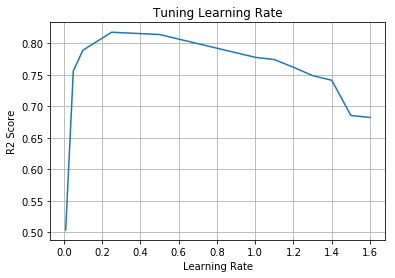

In [85]:
y=r2score_lr
x=learning_rates
plt.plot(x, y)
plt.yscale('linear')
plt.xlabel('Learning Rate')
plt.ylabel('R2 Score')
plt.title('Tuning Learning Rate')
plt.grid(True)
plt.show()

Tuning no. of estimator( No. of sequential decision trees)

In [86]:
r2score_ne=[]

n_estimator = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200,250,300,400,500,600,750,900,1050]

for n_est in n_estimator:
    model_tuning_est = GradientBoostingRegressor(n_estimators=n_est,learning_rate=0.25,random_state=42)
    model_tuning_est.fit(X_train,y_train)
        
    pred_tune_est_test = model_tuning_est.predict(X_test)
    
    r2score_ne.append(r2_score(y_test, pred_tune_est_test, multioutput='variance_weighted'))

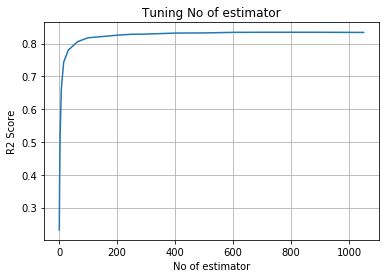

In [87]:
y=r2score_ne
x=n_estimator
plt.plot(x, y)
plt.yscale('linear')
plt.xlabel('No of estimator')
plt.ylabel('R2 Score')
plt.title('Tuning No of estimator')
plt.grid(True)
plt.show()